<a href="https://colab.research.google.com/github/jatmoracruz-34/estadisticas-2026b/blob/main/Copia_de_test_energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
link="https://raw.githubusercontent.com/jatmoracruz-34/estadisticas-2026b/refs/heads/main/test_energy_data.csv"
df = pd.read_csv(link)

df

,edificio,pies_cuadrados,numero_ocupantes,aparatos,temperatura,dia,energia
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   edificio          100 non-null    object 
 1   pies_cuadrados    100 non-null    int64  
 2   numero_ocupantes  100 non-null    int64  
 3   aparatos          100 non-null    int64  
 4   temperatura       100 non-null    float64
 5   dia               100 non-null    object 
 6   energia           100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [ ]:
df. describe ()
#se toma del medio para el 12

,pies_cuadrados,numero_ocupantes,aparatos,temperatura,energia
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,25881.920000,47.230000,26.970000,22.043300,4187.57830
std,13711.075264,29.905526,14.237846,6.957951,832.55985
min,1161.000000,2.000000,1.000000,10.400000,2351.97000
25%,14161.000000,21.000000,16.750000,15.682500,3621.92500
50%,27582.500000,47.000000,27.500000,21.970000,4249.39000
75%,38109.500000,73.000000,39.250000,27.492500,4797.17500
max,49354.000000,99.000000,49.000000,34.710000,6042.56000


In [ ]:
x=df["pies_cuadrados"]
y=df["energia"]

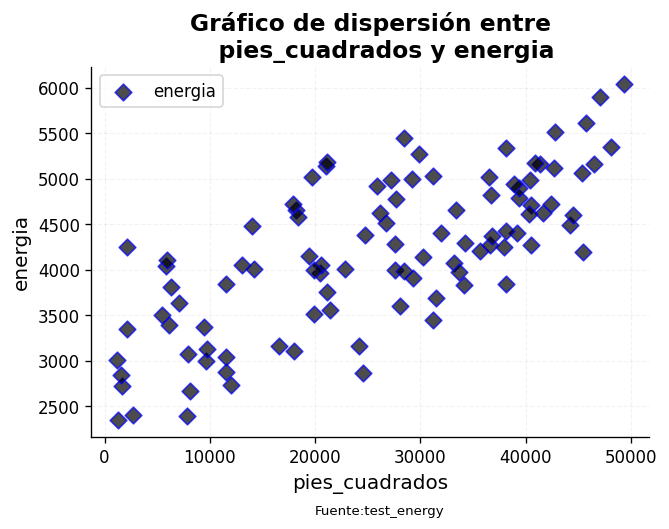

In [ ]:
import matplotlib.pyplot as plt
plt.figure(
    figsize=(6, 4),
    dpi=120
)
plt.scatter(
    x, y,
    marker="D",
    color='black',
    edgecolor='blue',
    alpha=0.7,
    s=50,
    label='energia'
)
plt.title(
    '''Gráfico de dispersión entre
    pies_cuadrados y energia''',
    fontsize=14,
    fontweight='bold'
)
plt.xlabel(
    'pies_cuadrados',
    fontsize=12
)
plt.ylabel(
    'energia',
    fontsize=12
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.margins(x=0.05, y=0.05)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.grid(
    visible=True,
    linestyle='--',
    linewidth=0.7,
    alpha=0.1,
    color="gray"
)
plt.legend(
    fontsize=10,
    loc='best',
    frameon=True
)
plt.text(
    0.4, -0.2,
    'Fuente:test_energy',
    fontsize=8,
    ha='left',
    va='center',
    transform=plt.gca().transAxes
)
plt.savefig(
    "grafico de dispersión",
    bbox_inches='tight'
    )

plt.show()

In [ ]:
from scipy.stats import pearsonr
r, valor_p = pearsonr(x, y)

print(f"Coeficiente de correlación: {r: 0.4f}")
print(f'Valor p: {valor_p: 0.4f}')

Coeficiente de correlación:  0.7240
Valor p:  0.0000


In [ ]:

import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()
y_calculada = modelo.predict(x_constante)

modelo.params

,0
const,3049.682473
pies_cuadrados,0.043965


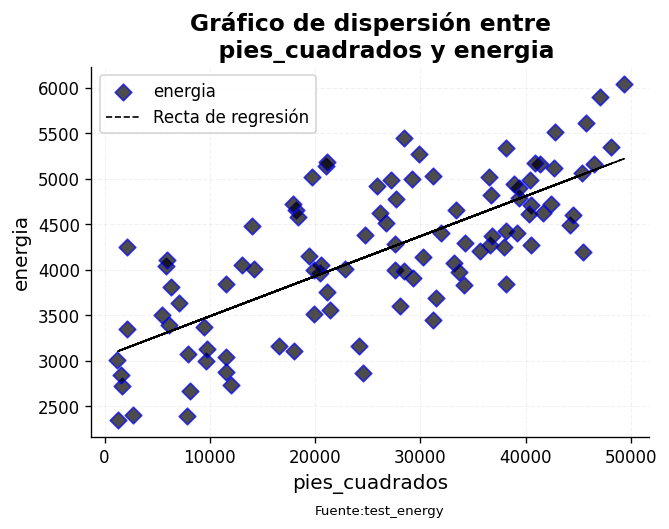

In [ ]:
import matplotlib.pyplot as plt
plt.figure(
    figsize=(6, 4),
    dpi=120
)
plt.scatter(
    x, y,
    marker="D",
    color='black',
    edgecolor='blue',
    alpha=0.7,
    s=50,
    label='energia'
)
plt.plot(
    x, y_calculada,
    color='black',
    linewidth=1,
    linestyle='--',
    marker='o',
    markersize=0,
    markerfacecolor='white',
    markeredgecolor='black',
    label='Recta de regresión'
)
plt.title(
    '''Gráfico de dispersión entre
    pies_cuadrados y energia''',
    fontsize=14,
    fontweight='bold'
)
plt.xlabel(
    'pies_cuadrados',
    fontsize=12
)
plt.ylabel(
    'energia',
    fontsize=12
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.margins(x=0.05, y=0.05)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.grid(
    visible=True,
    linestyle='--',
    linewidth=0.7,
    alpha=0.1,
    color="gray"
)
plt.legend(
    fontsize=10,
    loc='best',
    frameon=True
)
plt.text(
    0.4, -0.2,
    'Fuente:test_energy',
    fontsize=8,
    ha='left',
    va='center',
    transform=plt.gca().transAxes
)
plt.savefig(
    "grafico de dispersión",
    bbox_inches='tight'
    )

plt.show()

In [ ]:
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, y_calculada)
print(f'Coeficiente de determinación: {r2: 0.2%}\n')

Coeficiente de determinación:  52.42%



In [ ]:
modelo.conf_int(alpha = 0.05)

,0,1
const,2804.038639,3295.326306
pies_cuadrados,0.035569,0.052361


In [ ]:
residuales = modelo.resid

residuales

,0
0,-1264.022124
1,21.433901
2,25.966359
3,-255.421118
4,156.516679
...,...
95,-89.915713
96,-469.352384
97,-274.579775
98,204.402833


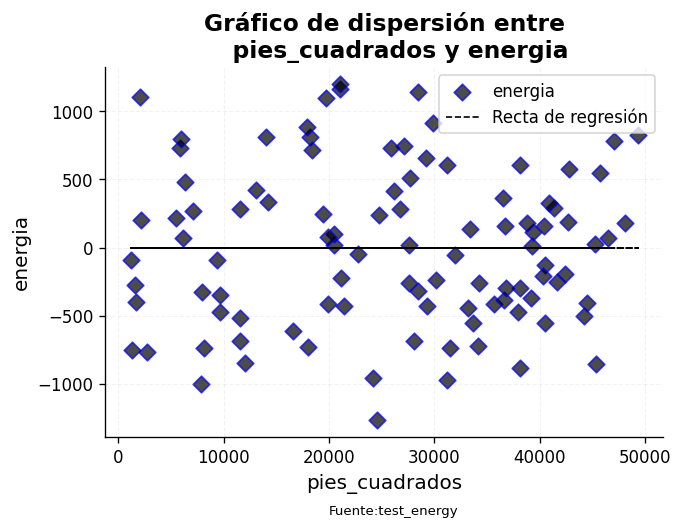

In [ ]:
import matplotlib.pyplot as plt
plt.figure(
    figsize=(6, 4),
    dpi=120
)
plt.scatter(
    x, residuales,
    marker="D",
    color='black',
    edgecolor='blue',
    alpha=0.7,
    s=50,
    label='energia'
)
plt.plot(
    x, 0 * y_calculada,
    color='black',
    linewidth=1,
    linestyle='--',
    marker='o',
    markersize=0,
    markerfacecolor='white',
    markeredgecolor='black',
    label='Recta de regresión'
)
plt.title(
    '''Gráfico de dispersión entre
    pies_cuadrados y energia''',
    fontsize=14,
    fontweight='bold'
)
plt.xlabel(
    'pies_cuadrados',
    fontsize=12
)
plt.ylabel(
    'energia',
    fontsize=12
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.margins(x=0.05, y=0.05)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.grid(
    visible=True,
    linestyle='--',
    linewidth=0.7,
    alpha=0.1,
    color="gray"
)
plt.legend(
    fontsize=10,
    loc='best',
    frameon=True
)
plt.text(
    0.4, -0.2,
    'Fuente:test_energy',
    fontsize=8,
    ha='left',
    va='center',
    transform=plt.gca().transAxes
)
plt.savefig(
    "grafico de dispersión",
    bbox_inches='tight'
    )

plt.show()

valor-p (Shapiro) = 0.16078497005838294


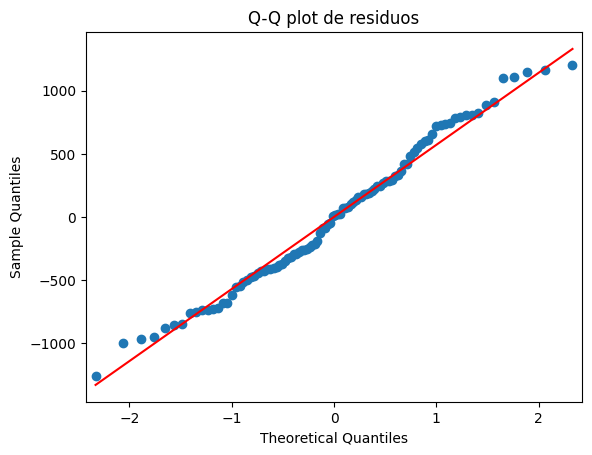

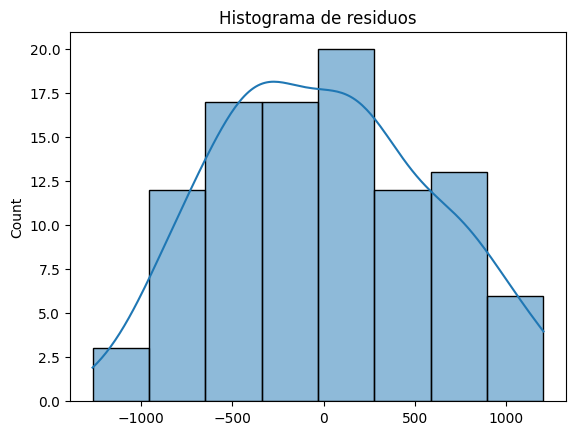

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
stat, valor_p_sh = shapiro(residuales)
print(f"valor-p (Shapiro) = {valor_p_sh}")
sm.qqplot(residuales, line='s')
plt.title("Q-Q plot de residuos")
plt.show()
sns.histplot(residuales, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

valor_p de Breusch-Pagan:  0.1022



In [ ]:
modelo.predict([25881,920000])

array([78969279.78302908])

In [ ]:
from statsmodels.formula.api import ols
modelo_lineal = ols('energia ~ pies_cuadrados', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
pies_cuadrados,1.0,3.597413e+07,3.597413e+07,107.983064,1.713693e-17
Residual,98.0,3.264831e+07,3.331460e+05,NaN,NaN
